# 1. Loading

https://www.kaggle.com/datasets/milanvaddoriya/old-car-price-prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
file=pd.read_csv("car_price.csv.xls")
file.head(2)

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats


# 2. Dropping unnecessary columns

first column is just an index column.

In [4]:
df=file.drop(columns='Unnamed: 0').copy()

In [5]:
df.head(2)

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats


# 3. General details on the dataset

In [6]:
df.shape

(5512, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_name             5512 non-null   object
 1   car_prices_in_rupee  5512 non-null   object
 2   kms_driven           5512 non-null   object
 3   fuel_type            5512 non-null   object
 4   transmission         5512 non-null   object
 5   ownership            5512 non-null   object
 6   manufacture          5512 non-null   int64 
 7   engine               5512 non-null   object
 8   Seats                5512 non-null   object
dtypes: int64(1), object(8)
memory usage: 387.7+ KB


In [7]:
df.describe()

,manufacture
count,5512.000000
mean,2015.455552
std,3.927974
min,1995.000000
25%,2013.000000
50%,2016.000000
75%,2018.000000
max,2022.000000


In [8]:
df.describe(include='object')

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,engine,Seats
count,5512,5512,5512,5512,5512,5512,5512,5512
unique,1896,1300,2610,5,2,6,139,6
top,Maruti Alto 800 LXI,4.50 Lakh,"80,000 kms",Petrol,Manual,1st Owner,1197 cc,5 Seats
freq,53,62,163,2967,3962,3736,714,4673


In [9]:
df.isnull().sum()

car_name               0
car_prices_in_rupee    0
kms_driven             0
fuel_type              0
transmission           0
ownership              0
manufacture            0
engine                 0
Seats                  0
dtype: int64

# 4. Renaming columns for readability

gave observation parameters in the column name itself

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_name             5512 non-null   object
 1   car_prices_in_rupee  5512 non-null   object
 2   kms_driven           5512 non-null   object
 3   fuel_type            5512 non-null   object
 4   transmission         5512 non-null   object
 5   ownership            5512 non-null   object
 6   manufacture          5512 non-null   int64 
 7   engine               5512 non-null   object
 8   Seats                5512 non-null   object
dtypes: int64(1), object(8)
memory usage: 387.7+ KB


In [11]:
df.rename(columns={'car_prices_in_rupee':'price', 'engine':'engine_cc'}, inplace=True)

In [12]:
df.head(2)

,car_name,price,kms_driven,fuel_type,transmission,ownership,manufacture,engine_cc,Seats
0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats


# 5. Dropping duplicates

In [13]:
df.duplicated().sum()

76

In [14]:
df[df.duplicated(keep="first")==True] #gives last duplicates

,car_name,price,kms_driven,fuel_type,transmission,ownership,manufacture,engine_cc,Seats
1151,Audi Q5 3.0 TDI Quattro,9.95 Lakh,"68,000 kms",Diesel,Automatic,3rd Owner,2011,2967 cc,5 Seats
1297,Mercedes-Benz GLS 350d Grand Edition,59.50 Lakh,"45,000 kms",Diesel,Automatic,2nd Owner,2016,2499 cc,5 Seats
1351,Honda Jazz 1.2 V AT i VTEC,6.90 Lakh,"27,200 kms",Petrol,Automatic,1st Owner,2017,1462 cc,5 Seats
1352,Mahindra Thar CRDe,7.72 Lakh,"46,365 kms",Diesel,Manual,1st Owner,2017,1461 cc,5 Seats
1353,Maruti Ciaz Alpha BSIV,8.72 Lakh,"82,496 kms",Petrol,Manual,1st Owner,2019,1248 cc,5 Seats
...,...,...,...,...,...,...,...,...,...
5301,Mercedes-Benz E-Class E250 CDI Avantgarde,25.90 Lakh,"60,625 kms",Diesel,Automatic,2nd Owner,2016,1197 cc,5 Seats
5318,Mercedes-Benz E-Class Exclusive E 220d,76.25 Lakh,"2,000 kms",Diesel,Automatic,1st Owner,2022,1950 cc,5 Seats
5322,BMW X3 xDrive 20d Luxury Line,60 Lakh,"19,000 kms",Diesel,Automatic,1st Owner,2021,1997 cc,5 Seats
5338,Volvo S90 D4 Inscription BSIV,44.75 Lakh,"20,000 kms",Diesel,Automatic,1st Owner,2018,1950 cc,5 Seats


In [15]:
df.drop_duplicates(keep="first",inplace=True)

In [16]:
df

,car_name,price,kms_driven,fuel_type,transmission,ownership,manufacture,engine_cc,Seats
0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats
...,...,...,...,...,...,...,...,...,...
5507,BMW X1 sDrive 20d xLine,28.90 Lakh,"45,000 kms",Diesel,Automatic,1st Owner,2018,2995 cc,7 Seats
5508,BMW M Series M4 Coupe,64.90 Lakh,"29,000 kms",Petrol,Automatic,2nd Owner,2015,1968 cc,5 Seats
5509,Jaguar XF 2.2 Litre Luxury,13.75 Lakh,"90,000 kms",Diesel,Automatic,2nd Owner,2013,2755 cc,5 Seats
5510,BMW 7 Series 730Ld,29.90 Lakh,"79,000 kms",Diesel,Automatic,3rd Owner,2015,2967 cc,6 Seats


In [18]:
df[df.duplicated()==True]

,car_name,price,kms_driven,fuel_type,transmission,ownership,manufacture,engine_cc,Seats


# 6. Data cleaning

In [19]:
#using dc for data cleaning
dc_price=df.copy()

### 6.1 price

price has: 

"," (for those which are not in lakhs)

".", "Lakh" (for those which are in lakhs)

".", "Crore" (for those which are in lakhs)

Agenda: make everything into digits in rupees

In [20]:
dc_price.head(2)

,car_name,price,kms_driven,fuel_type,transmission,ownership,manufacture,engine_cc,Seats
0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats


In [21]:
dc_price['price'].value_counts()

4.50 Lakh     62
3.50 Lakh     61
3 Lakh        58
6.50 Lakh     57
5.50 Lakh     51
              ..
49 Lakh        1
61,000         1
19 Lakh        1
16.25 Lakh     1
31.90 Lakh     1
Name: price, Length: 1300, dtype: int64

In [22]:
def price_cleaning(x):
    if "Lakh" in x:
        l=x.split()
        res=float(l[0])
        return res*100000
    if "Crore" in x:
        l=x.split()
        res=float(l[0])
        return res*10000000
    m=[]
    if "," in x:
        m=x.split(',')[0]
        res="".join(m)
        return float(res)

dc_price['price']=dc_price['price'].apply(price_cleaning)

In [23]:
c=dc_price['price']/100000

In [24]:
dc_price['price'].isnull().sum()

0

In [25]:
dc_price['price_in_lakhs']=c

In [26]:
dc_price.head(2)

,car_name,price,kms_driven,fuel_type,transmission,ownership,manufacture,engine_cc,Seats,price_in_lakhs
0,Jeep Compass 2.0 Longitude Option BSIV,1003000.0,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats,10.03
1,Renault Duster RXZ Turbo CVT,1283000.0,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats,12.83


### 6.2 kms_driven

kms_driven has:

"kms" for all observations

single "," in some observations

double "," in some observations

some does not have "," at all

Agenda: make it into digits

In [27]:
#using dc for data cleaning
dc_kms=dc_price.copy()

In [28]:
dc_kms.head(2)

,car_name,price,kms_driven,fuel_type,transmission,ownership,manufacture,engine_cc,Seats,price_in_lakhs
0,Jeep Compass 2.0 Longitude Option BSIV,1003000.0,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats,10.03
1,Renault Duster RXZ Turbo CVT,1283000.0,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats,12.83


In [29]:
dc_kms['kms_driven'].value_counts()

80,000 kms      163
1,20,000 kms    146
60,000 kms      141
50,000 kms      136
70,000 kms      132
               ... 
1,18,587 kms      1
72,318 kms        1
88,579 kms        1
69,509 kms        1
85,002 kms        1
Name: kms_driven, Length: 2610, dtype: int64

In [30]:
def kms_cleaning(x):
    m=[]
    res=''
    without_kms=x.split()[:-1]
    x="".join(without_kms)
    
    if "," in x:
        m=x.split(',')
        res="".join(m)
        return float(res)
    else:
        return float(x)


dc_kms['kms_driven']=dc_kms['kms_driven'].apply(kms_cleaning)

In [31]:
dc_kms['kms_driven'].head()

0    86226.0
1    13248.0
2    60343.0
3    26696.0
4    69414.0
Name: kms_driven, dtype: float64

In [32]:
dc_kms['kms_driven'].isnull().sum()

0

In [33]:
dc_kms.head()

,car_name,price,kms_driven,fuel_type,transmission,ownership,manufacture,engine_cc,Seats,price_in_lakhs
0,Jeep Compass 2.0 Longitude Option BSIV,1003000.0,86226.0,Diesel,Manual,1st Owner,2017,1956 cc,5 Seats,10.03
1,Renault Duster RXZ Turbo CVT,1283000.0,13248.0,Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats,12.83
2,Toyota Camry 2.5 G,1640000.0,60343.0,Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats,16.40
3,Honda Jazz VX CVT,777000.0,26696.0,Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats,7.77
4,Volkswagen Polo 1.2 MPI Highline,515000.0,69414.0,Petrol,Manual,1st Owner,2016,1199 cc,5 Seats,5.15


### 6.3 ownership

ownership has:

st, nd, rd, th...... and Owner in all the observations

what is 0th onwer? Considering that they are brand new since same car name was repeated else where.

In [34]:
dc_own=dc_kms.copy()

In [35]:
dc_own['ownership'].value_counts()

1st Owner    3678
2nd Owner    1298
3rd Owner     358
4th Owner      84
5th Owner      12
0th Owner       6
Name: ownership, dtype: int64

In [36]:
dc_own['ownership']=dc_own['ownership'].apply(lambda x: int(x[0]))

In [37]:
dc_own['ownership'].value_counts()

1    3678
2    1298
3     358
4      84
5      12
0       6
Name: ownership, dtype: int64

In [38]:
dc_own.head()

,car_name,price,kms_driven,fuel_type,transmission,ownership,manufacture,engine_cc,Seats,price_in_lakhs
0,Jeep Compass 2.0 Longitude Option BSIV,1003000.0,86226.0,Diesel,Manual,1,2017,1956 cc,5 Seats,10.03
1,Renault Duster RXZ Turbo CVT,1283000.0,13248.0,Petrol,Automatic,1,2021,1330 cc,5 Seats,12.83
2,Toyota Camry 2.5 G,1640000.0,60343.0,Petrol,Automatic,1,2016,2494 cc,5 Seats,16.40
3,Honda Jazz VX CVT,777000.0,26696.0,Petrol,Automatic,1,2018,1199 cc,5 Seats,7.77
4,Volkswagen Polo 1.2 MPI Highline,515000.0,69414.0,Petrol,Manual,1,2016,1199 cc,5 Seats,5.15


### 6.4 engine_cc

remove cc and make it float

In [39]:
dc_eng=dc_own.copy()

In [40]:
dc_eng['engine_cc'].value_counts()

1197 cc    699
1248 cc    387
998 cc     340
1498 cc    249
1497 cc    243
          ... 
1173 cc      1
2359 cc      1
5950 cc      1
3956 cc      1
2979 cc      1
Name: engine_cc, Length: 139, dtype: int64

In [41]:
def cc(x):
    if "cc" in x:
        l=x.split()
        res=float(l[0])
        return res

dc_eng['engine_cc']=dc_eng['engine_cc'].apply(cc)

In [42]:
dc_eng['engine_cc'].isnull().sum()

0

In [43]:
dc_eng.head()

,car_name,price,kms_driven,fuel_type,transmission,ownership,manufacture,engine_cc,Seats,price_in_lakhs
0,Jeep Compass 2.0 Longitude Option BSIV,1003000.0,86226.0,Diesel,Manual,1,2017,1956.0,5 Seats,10.03
1,Renault Duster RXZ Turbo CVT,1283000.0,13248.0,Petrol,Automatic,1,2021,1330.0,5 Seats,12.83
2,Toyota Camry 2.5 G,1640000.0,60343.0,Petrol,Automatic,1,2016,2494.0,5 Seats,16.40
3,Honda Jazz VX CVT,777000.0,26696.0,Petrol,Automatic,1,2018,1199.0,5 Seats,7.77
4,Volkswagen Polo 1.2 MPI Highline,515000.0,69414.0,Petrol,Manual,1,2016,1199.0,5 Seats,5.15


### 6.5 Seats

remove seats and make it float

In [44]:
dc_seats=dc_eng.copy()

In [45]:
dc_seats['Seats'].value_counts()

5 Seats    4603
7 Seats     626
4 Seats      88
6 Seats      60
8 Seats      54
2 Seats       5
Name: Seats, dtype: int64

In [46]:
def seat(x):
    if "Seats" in x:
        l=x.split()
        res=int(l[0])
        return res

dc_seats['Seats']=dc_seats['Seats'].apply(seat)

In [47]:
dc_seats['Seats'].value_counts()

5    4603
7     626
4      88
6      60
8      54
2       5
Name: Seats, dtype: int64

In [48]:
dc_seats.head()

,car_name,price,kms_driven,fuel_type,transmission,ownership,manufacture,engine_cc,Seats,price_in_lakhs
0,Jeep Compass 2.0 Longitude Option BSIV,1003000.0,86226.0,Diesel,Manual,1,2017,1956.0,5,10.03
1,Renault Duster RXZ Turbo CVT,1283000.0,13248.0,Petrol,Automatic,1,2021,1330.0,5,12.83
2,Toyota Camry 2.5 G,1640000.0,60343.0,Petrol,Automatic,1,2016,2494.0,5,16.40
3,Honda Jazz VX CVT,777000.0,26696.0,Petrol,Automatic,1,2018,1199.0,5,7.77
4,Volkswagen Polo 1.2 MPI Highline,515000.0,69414.0,Petrol,Manual,1,2016,1199.0,5,5.15


### 6.6 car_name

create new columns with brand name and model name


In [49]:
dc_car=dc_seats.copy()

In [50]:
dc_car['car_name'].to_frame()

,car_name
0,Jeep Compass 2.0 Longitude Option BSIV
1,Renault Duster RXZ Turbo CVT
2,Toyota Camry 2.5 G
3,Honda Jazz VX CVT
4,Volkswagen Polo 1.2 MPI Highline
...,...
5507,BMW X1 sDrive 20d xLine
5508,BMW M Series M4 Coupe
5509,Jaguar XF 2.2 Litre Luxury
5510,BMW 7 Series 730Ld


In [51]:
len(dc_car['car_name'].value_counts())

1896

In [52]:
first_expand=dc_car['car_name'].str.split(" ",n=1, expand=True)
first_expand

,0,1
0,Jeep,Compass 2.0 Longitude Option BSIV
1,Renault,Duster RXZ Turbo CVT
2,Toyota,Camry 2.5 G
3,Honda,Jazz VX CVT
4,Volkswagen,Polo 1.2 MPI Highline
...,...,...
5507,BMW,X1 sDrive 20d xLine
5508,BMW,M Series M4 Coupe
5509,Jaguar,XF 2.2 Litre Luxury
5510,BMW,7 Series 730Ld


In [53]:
dc_car.insert(1,"Brand",value=first_expand[0])

In [54]:
dc_car.insert(2,"model",value=first_expand[1])

In [55]:
dc_car.head()

,car_name,Brand,model,price,kms_driven,fuel_type,transmission,ownership,manufacture,engine_cc,Seats,price_in_lakhs
0,Jeep Compass 2.0 Longitude Option BSIV,Jeep,Compass 2.0 Longitude Option BSIV,1003000.0,86226.0,Diesel,Manual,1,2017,1956.0,5,10.03
1,Renault Duster RXZ Turbo CVT,Renault,Duster RXZ Turbo CVT,1283000.0,13248.0,Petrol,Automatic,1,2021,1330.0,5,12.83
2,Toyota Camry 2.5 G,Toyota,Camry 2.5 G,1640000.0,60343.0,Petrol,Automatic,1,2016,2494.0,5,16.40
3,Honda Jazz VX CVT,Honda,Jazz VX CVT,777000.0,26696.0,Petrol,Automatic,1,2018,1199.0,5,7.77
4,Volkswagen Polo 1.2 MPI Highline,Volkswagen,Polo 1.2 MPI Highline,515000.0,69414.0,Petrol,Manual,1,2016,1199.0,5,5.15


In [56]:
len(dc_car['Brand'].value_counts())

32

In [57]:
dc_car['Brand'].value_counts() #seems good

Maruti           1369
Hyundai          1009
Honda             492
Mahindra          309
Mercedes-Benz     276
Tata              268
Toyota            263
Ford              168
Renault           167
BMW               166
Audi              162
Volkswagen        159
Skoda             113
Chevrolet          82
Nissan             63
MG                 61
Kia                61
Jeep               48
Land               47
Volvo              30
Jaguar             29
Datsun             25
Fiat               17
Mini               13
Porsche            10
Lexus              10
Mitsubishi          8
Maserati            4
Isuzu               4
Force               1
Premier             1
Bentley             1
Name: Brand, dtype: int64

In [58]:
len(dc_car['model'].value_counts())

1896

In [59]:
dc_car['model'].value_counts().to_frame()

,model
Alto 800 LXI,53
Swift VXI,46
Wagon R VXI BS IV,43
Swift Dzire VXI,42
Swift Dzire VDI,41
...,...
Creta 1.6 E Plus,1
Accent VIVA CRDi,1
City CVT,1
Esteem Vxi - BSIII,1


In [60]:
dc_car.drop(columns='car_name', inplace=True)

In [61]:
dc_car.head(2)

,Brand,model,price,kms_driven,fuel_type,transmission,ownership,manufacture,engine_cc,Seats,price_in_lakhs
0,Jeep,Compass 2.0 Longitude Option BSIV,1003000.0,86226.0,Diesel,Manual,1,2017,1956.0,5,10.03
1,Renault,Duster RXZ Turbo CVT,1283000.0,13248.0,Petrol,Automatic,1,2021,1330.0,5,12.83


### 6.7 Manufacture

In [62]:
dc_car['manufacture']=dc_car['manufacture'].astype(object)
dc_car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5436 entries, 0 to 5511
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           5436 non-null   object 
 1   model           5436 non-null   object 
 2   price           5436 non-null   float64
 3   kms_driven      5436 non-null   float64
 4   fuel_type       5436 non-null   object 
 5   transmission    5436 non-null   object 
 6   ownership       5436 non-null   int64  
 7   manufacture     5436 non-null   object 
 8   engine_cc       5436 non-null   float64
 9   Seats           5436 non-null   int64  
 10  price_in_lakhs  5436 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 509.6+ KB


In [63]:
dc_man=dc_car.copy()
dc_man

,Brand,model,price,kms_driven,fuel_type,transmission,ownership,manufacture,engine_cc,Seats,price_in_lakhs
0,Jeep,Compass 2.0 Longitude Option BSIV,1003000.0,86226.0,Diesel,Manual,1,2017,1956.0,5,10.03
1,Renault,Duster RXZ Turbo CVT,1283000.0,13248.0,Petrol,Automatic,1,2021,1330.0,5,12.83
2,Toyota,Camry 2.5 G,1640000.0,60343.0,Petrol,Automatic,1,2016,2494.0,5,16.40
3,Honda,Jazz VX CVT,777000.0,26696.0,Petrol,Automatic,1,2018,1199.0,5,7.77
4,Volkswagen,Polo 1.2 MPI Highline,515000.0,69414.0,Petrol,Manual,1,2016,1199.0,5,5.15
...,...,...,...,...,...,...,...,...,...,...,...
5507,BMW,X1 sDrive 20d xLine,2890000.0,45000.0,Diesel,Automatic,1,2018,2995.0,7,28.90
5508,BMW,M Series M4 Coupe,6490000.0,29000.0,Petrol,Automatic,2,2015,1968.0,5,64.90
5509,Jaguar,XF 2.2 Litre Luxury,1375000.0,90000.0,Diesel,Automatic,2,2013,2755.0,5,13.75
5510,BMW,7 Series 730Ld,2990000.0,79000.0,Diesel,Automatic,3,2015,2967.0,6,29.90


# 7. Univariate Analysis

In [64]:
#use cleaned dataframe as cdf
cdf=dc_man.copy()

In [65]:
cdf.head(3)

,Brand,model,price,kms_driven,fuel_type,transmission,ownership,manufacture,engine_cc,Seats,price_in_lakhs
0,Jeep,Compass 2.0 Longitude Option BSIV,1003000.0,86226.0,Diesel,Manual,1,2017,1956.0,5,10.03
1,Renault,Duster RXZ Turbo CVT,1283000.0,13248.0,Petrol,Automatic,1,2021,1330.0,5,12.83
2,Toyota,Camry 2.5 G,1640000.0,60343.0,Petrol,Automatic,1,2016,2494.0,5,16.40


### Brand

we have 32 brand 

<AxesSubplot:xlabel='Count', ylabel='Brand'>

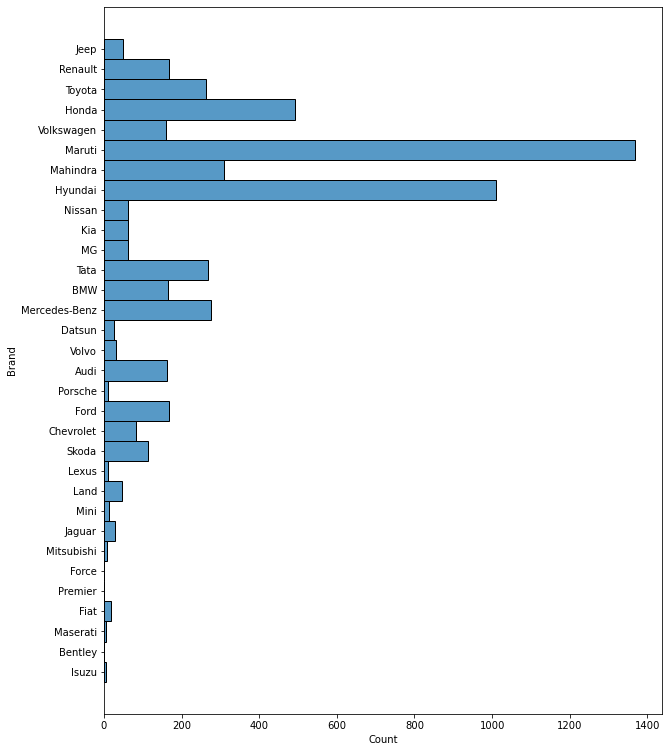

In [66]:
plt.figure(figsize=(10,13))
sns.histplot(y=cdf['Brand'])

### model

we have 1896 models

In [92]:
cdf['model'].unique()

array(['Compass 2.0 Longitude Option BSIV', 'Duster RXZ Turbo CVT',
       'Camry 2.5 G', ..., 'XC 90 D5 Momentum BSIV',
       'E-Class E250 Edition E', 'M Series M4 Coupe'], dtype=object)

In [93]:
cdf['model'].nunique()

1896

### price_in_lakhs

price seems to have so many outliers. Still it varies between budget cars and luxury cars

<AxesSubplot:xlabel='price_in_lakhs'>

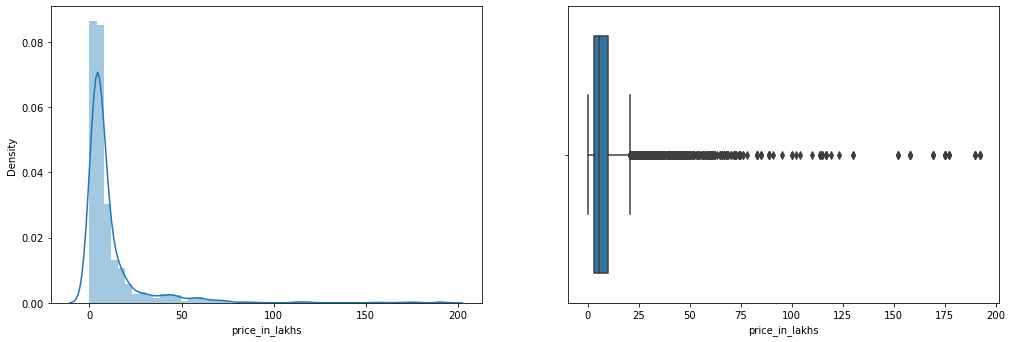

In [94]:
plt.figure(figsize=(17,12))
plt.subplot(221)
sns.distplot(cdf['price_in_lakhs'])

plt.subplot(222)
sns.boxplot(cdf['price_in_lakhs'])

In [95]:
cdf['price_in_lakhs'].describe().to_frame()

,price_in_lakhs
count,5436.000000
mean,11.495773
std,19.540507
min,0.000350
25%,3.130000
50%,5.500000
75%,10.202500
max,192.000000


### kms_driven

d

<AxesSubplot:xlabel='kms_driven'>

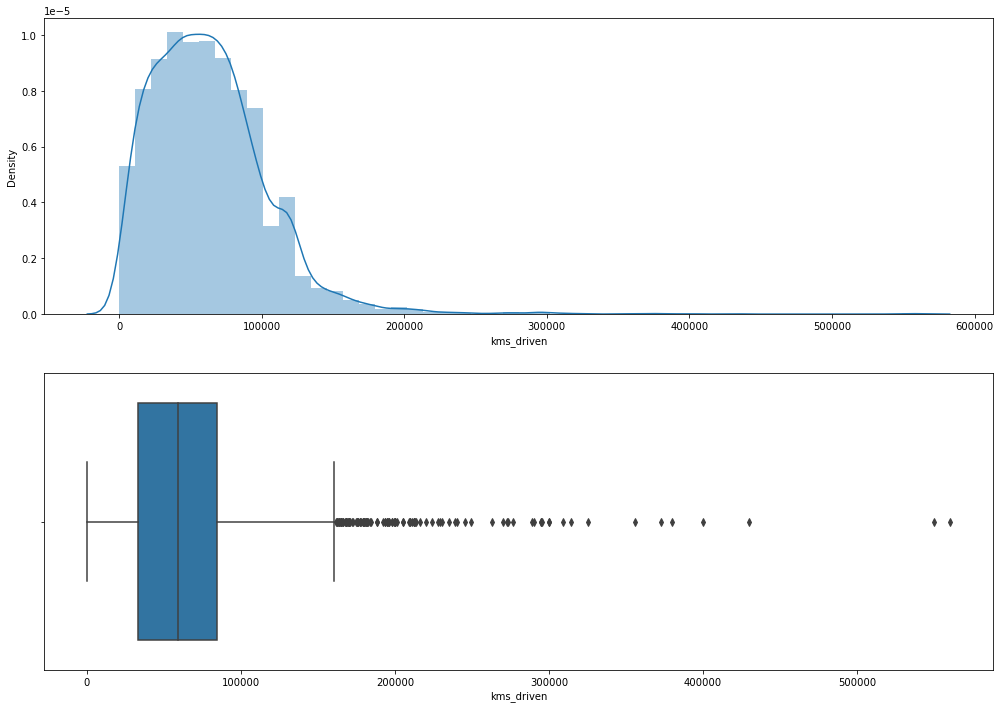

In [96]:
plt.figure(figsize=(17,12))
plt.subplot(211)
sns.distplot(cdf['kms_driven'])

plt.subplot(212)
sns.boxplot(cdf['kms_driven'])

### ownership

<AxesSubplot:xlabel='Count', ylabel='ownership'>

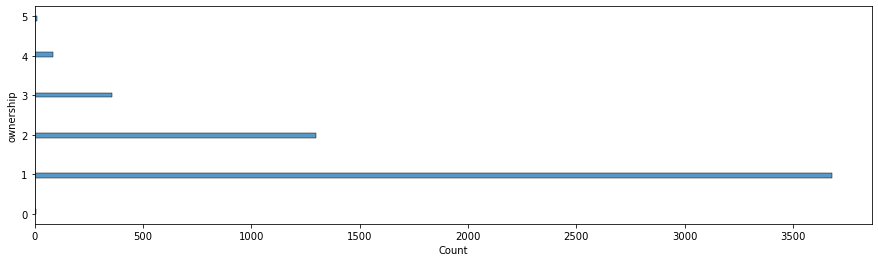

In [72]:
plt.figure(figsize=(15,4))
sns.histplot(y=cdf['ownership'])

In [73]:
cdf['ownership'].value_counts()

1    3678
2    1298
3     358
4      84
5      12
0       6
Name: ownership, dtype: int64

### manufacture

<AxesSubplot:xlabel='manufacture', ylabel='Density'>

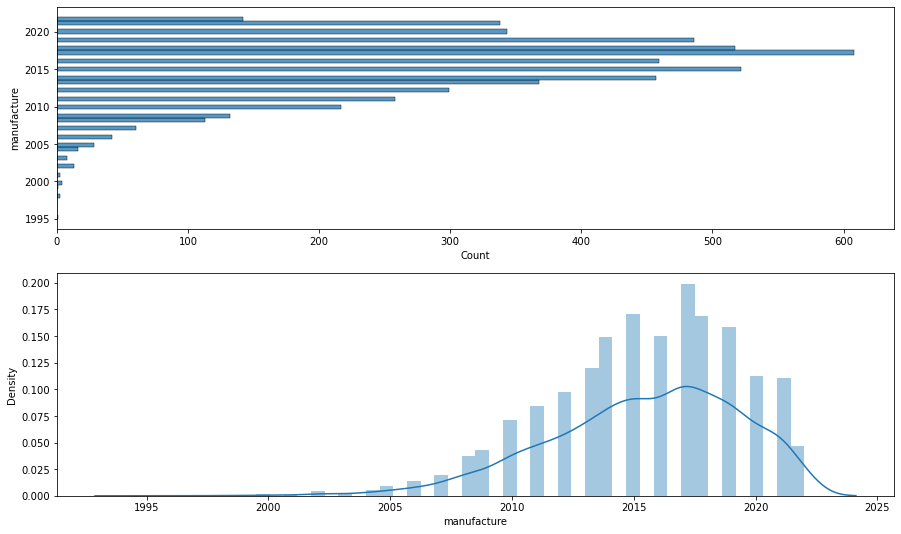

In [97]:
plt.figure(figsize=(15,9))
plt.subplot(211)
sns.histplot(y=cdf['manufacture'])

plt.subplot(212)
sns.distplot(cdf['manufacture'])

In [75]:
cdf['manufacture'].value_counts()

2017    608
2015    522
2018    517
2019    486
2016    459
2014    457
2013    368
2020    343
2021    338
2012    299
2011    258
2010    217
2022    142
2009    132
2008    113
2007     60
2006     42
2005     28
2004     16
2002     13
2003      8
2000      4
1998      2
2001      2
1995      1
1999      1
Name: manufacture, dtype: int64

### engine_cc

<AxesSubplot:xlabel='Count', ylabel='engine_cc'>

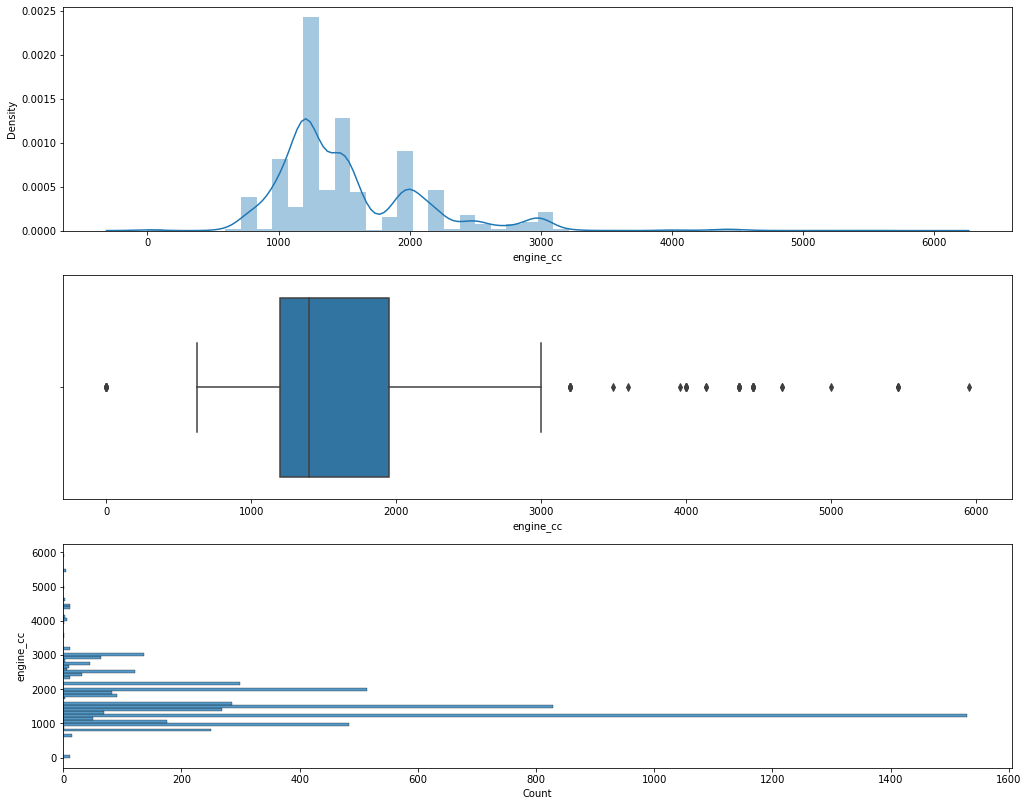

In [98]:
plt.figure(figsize=(17,14))
plt.subplot(311)
sns.distplot(cdf['engine_cc'])

plt.subplot(312)
sns.boxplot(cdf['engine_cc'])

plt.subplot(313)
sns.histplot(y=cdf['engine_cc'])

In [77]:
len(cdf['engine_cc'].value_counts())

139

### Seats

<AxesSubplot:xlabel='Seats', ylabel='Density'>

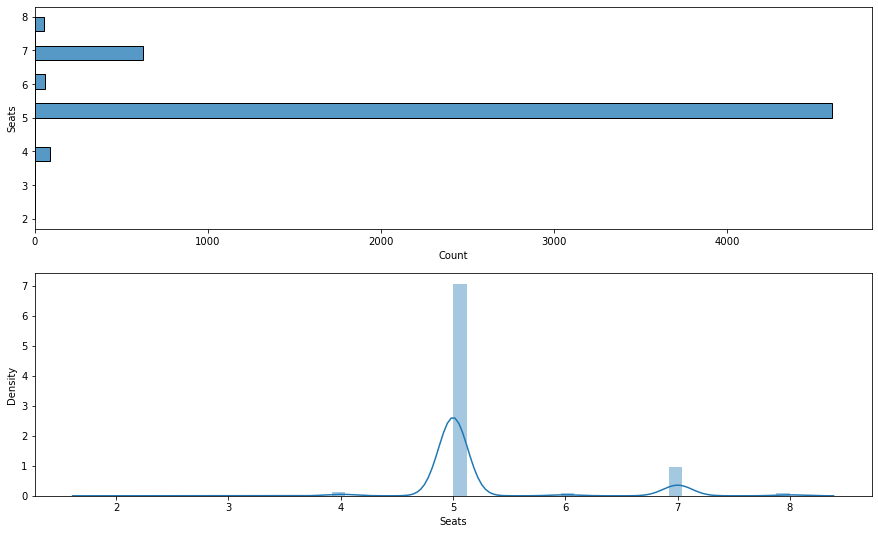

In [99]:
plt.figure(figsize=(15,9))
plt.subplot(211)
sns.histplot(y=cdf['Seats'])

plt.subplot(212)
sns.distplot(cdf['Seats'])

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5436 entries, 0 to 5511
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   car_name      5436 non-null   object
 1   price         5436 non-null   object
 2   kms_driven    5436 non-null   object
 3   fuel_type     5436 non-null   object
 4   transmission  5436 non-null   object
 5   ownership     5436 non-null   object
 6   manufacture   5436 non-null   int64 
 7   engine_cc     5436 non-null   object
 8   Seats         5436 non-null   object
dtypes: int64(1), object(8)
memory usage: 553.7+ KB


# 8.BI-VARIATE ANALYSIS 

In [80]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5436 entries, 0 to 5511
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           5436 non-null   object 
 1   model           5436 non-null   object 
 2   price           5436 non-null   float64
 3   kms_driven      5436 non-null   float64
 4   fuel_type       5436 non-null   object 
 5   transmission    5436 non-null   object 
 6   ownership       5436 non-null   int64  
 7   manufacture     5436 non-null   object 
 8   engine_cc       5436 non-null   float64
 9   Seats           5436 non-null   int64  
 10  price_in_lakhs  5436 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 638.7+ KB


In [81]:
cdf.columns

Index(['Brand', 'model', 'price', 'kms_driven', 'fuel_type', 'transmission',
       'ownership', 'manufacture', 'engine_cc', 'Seats', 'price_in_lakhs'],
      dtype='object')

## 8.1 Relation between Transmission and Price_in_lakhs by Fuel types

<AxesSubplot:xlabel='transmission', ylabel='price_in_lakhs'>

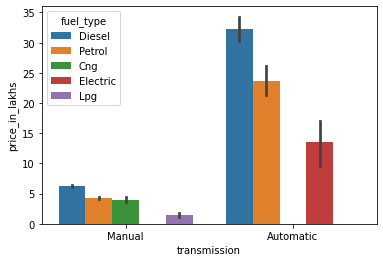

In [100]:
sns.barplot(cdf['transmission'],cdf['price_in_lakhs'],hue=cdf['fuel_type'])

Automatic Diesel cars has the highest average price is the market, while Manuel Lpg got the lowest average car price

## 8.2 Price_in_lakhs vs kms_driven

<AxesSubplot:xlabel='price_in_lakhs', ylabel='kms_driven'>

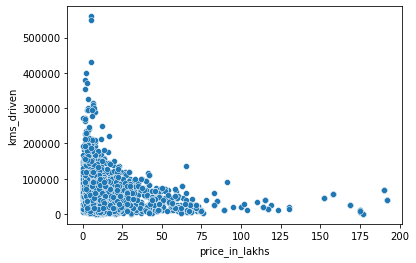

In [101]:
sns.scatterplot(cdf['price_in_lakhs'],cdf['kms_driven'])

By observing the above plot we can observe that the highest kilometres driven the price will be less.

## 8.3 Manufacture Vs price_in_lakhs

<function matplotlib.pyplot.show(close=None, block=None)>

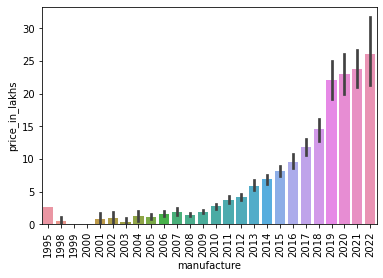

In [102]:
sns.barplot(cdf['manufacture'],cdf['price_in_lakhs'])
plt.xticks(rotation="vertical")
plt.show

A rise in manufacture year leads to increase in price.

## 8.4 Seats Vs Price_in_lakhs

<AxesSubplot:xlabel='Seats', ylabel='price_in_lakhs'>

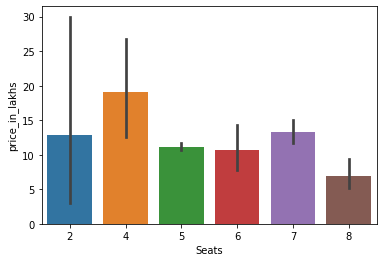

In [103]:
sns.barplot(cdf['Seats'],cdf['price_in_lakhs'])

The cars with 4Seats Capacity has highest price in Market.

## 8.5 Ownership Vs Price_in_lakhs


<function matplotlib.pyplot.show(close=None, block=None)>

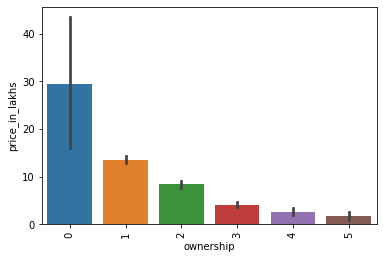

In [104]:
sns.barplot(cdf['ownership'],cdf['price_in_lakhs'])
plt.xticks(rotation="vertical")
plt.show

The above plot represents if there are more owners the price of the vehicle will get decreased.

## 8.6 Relation between fuel type and Average price_in_lakhs

<AxesSubplot:xlabel='fuel_type', ylabel='price_in_lakhs'>

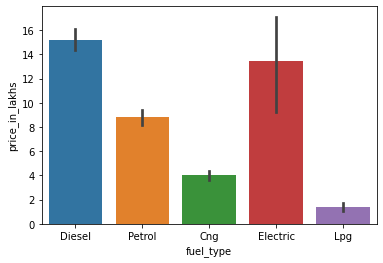

In [105]:
cdf.groupby('fuel_type').agg({'price_in_lakhs':'mean'}).sort_values('price_in_lakhs', ascending=False)
sns.barplot(cdf['fuel_type'],cdf['price_in_lakhs'])


The above bar plot represents the Diesel fuel type vehicles are high in mean price when compared to other fuel types.

## 8.7 Engine_cc Vs Price_in_lakhs

<AxesSubplot:xlabel='engine_cc', ylabel='price_in_lakhs'>

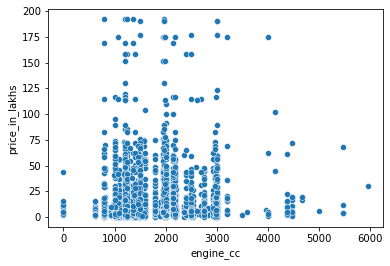

In [106]:
sns.scatterplot(cdf['engine_cc'],cdf['price_in_lakhs'])

## 8.8 Brand  Vs Price_in_lakhs

<function matplotlib.pyplot.show(close=None, block=None)>

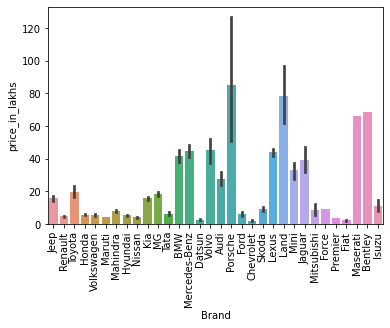

In [110]:
sns.barplot(cdf['Brand'],cdf['price_in_lakhs'])
plt.xticks(rotation="vertical")
plt.show